<a href="https://colab.research.google.com/github/NehaNeha417/ML_SHALA/blob/master/assignment9_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
data = pd.read_csv('assignment_shala_clustering.csv')
print(data.shape)

(200, 5)


In [40]:
data.head(200)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c8dadc320>,
      dtype=object)

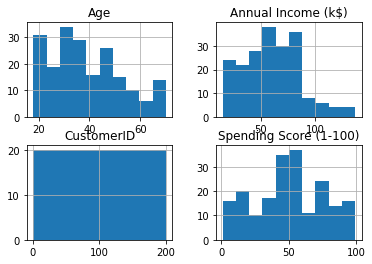

In [13]:
data.hist()

In [0]:
data.drop(['CustomerID'], axis=1,inplace=True)

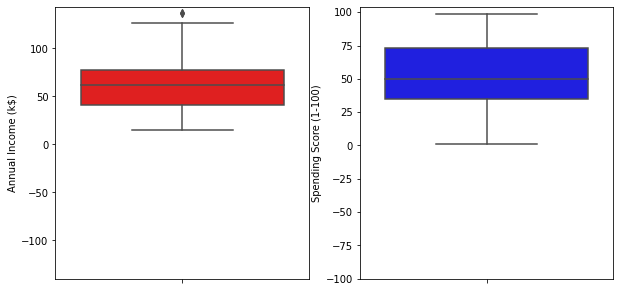

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=data["Annual Income (k$)"],color='red')
plt.ylim(0-140)
plt.subplot(1,2,2)
sns.boxplot(y=data["Spending Score (1-100)"],color='blue')
plt.ylim(0-100)
plt.show()


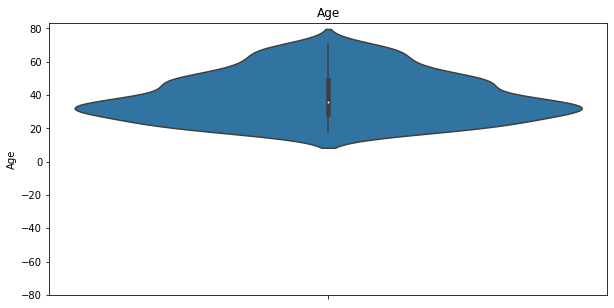

In [29]:
plt.figure(figsize=(10,5))
sns.violinplot(y=data['Age'])
plt.title('Age')
plt.ylim(20-100)
plt.ylabel('Age')
plt.show()

In [31]:
gender=data.Gender.value_counts()
print(gender)

Female    112
Male       88
Name: Gender, dtype: int64


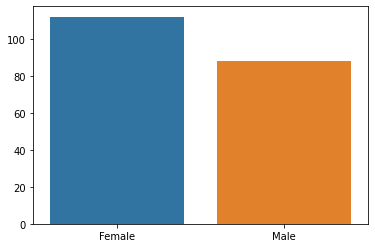

In [33]:
sns.barplot(x=gender.index,y=gender.values)

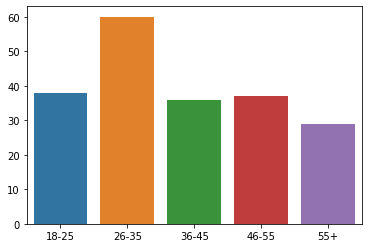

In [39]:
age18_25 = data.Age[(data.Age>=18) & (data.Age<=25)]
age26_35 = data.Age[(data.Age>=26) & (data.Age<=35)]
age36_45 = data.Age[(data.Age>=36) & (data.Age<=45)]
age46_55 = data.Age[(data.Age>=46) & (data.Age<=55)]
age_above56 = data.Age[(data.Age>=56)]

x = ['18-25','26-35','36-45','46-55','55+']
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age_above56.values)]
sns.barplot(x,y)



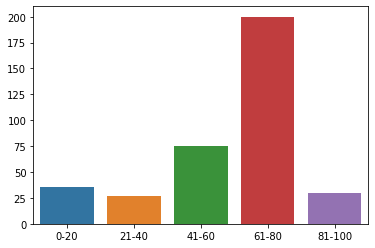

In [52]:
ss0_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] <=20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >=21) & (data["Spending Score (1-100)"]<=40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >=41) & (data["Spending Score (1-100)"]<=60)]
ss611_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >=61) & (data["Spending Score (1-100)"]<=80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >=81) & (data["Spending Score (1-100)"]<=100)]
x = ['0-20','21-40','41-60','61-80','81-100']
y = [len(ss0_20.values),len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]
sns.barplot(x,y)

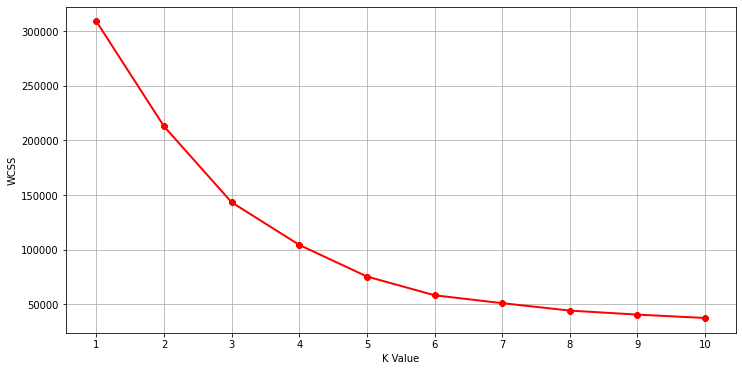

In [54]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

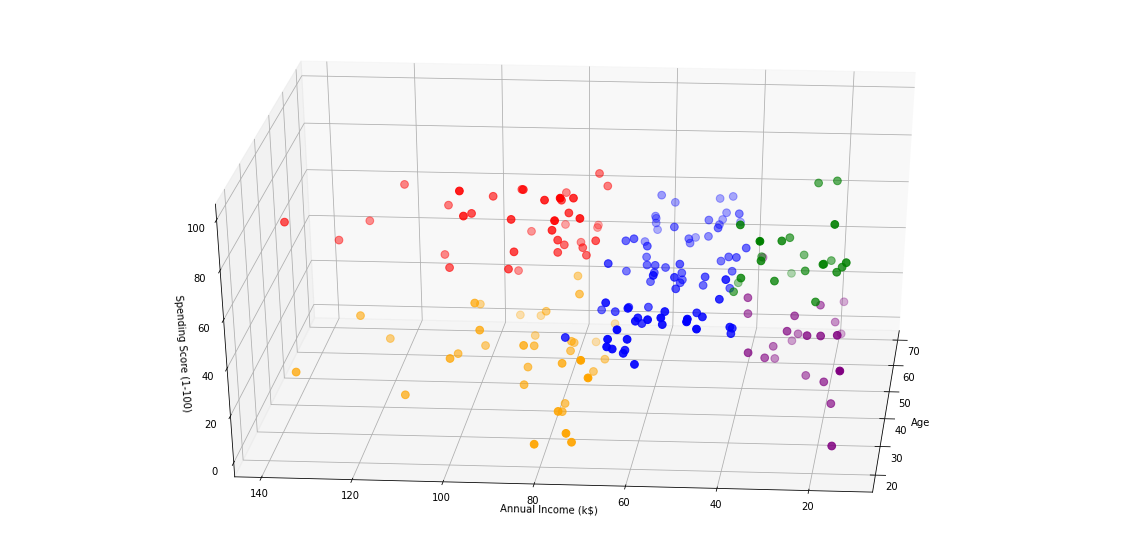

In [57]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(data.iloc[:,1:])

data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()
